<a href="https://colab.research.google.com/github/ToluPaul/forex/blob/main/forex_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier

In [53]:
vix = pd.read_csv('/content/vix.csv')

In [54]:
vix.head()

,Pair,Action,Outcome,cost,Date,EntryPrice,Sl,Tp,Time,Exittime,RRR
0,vix10,Buy,sl,-6.38,04/11/2023,7103.4040,7090.8190,7136.2280,0:19:21,4:10:46,2.608184346
1,vix25,Buy,tp,11.56,04/11/2023,2228.8090,2218.8910,2251.8760,20:26:02,22:23:30,2.325771325
2,vix100,Sell,tp,26.46,05/11/2023,1802.8000,1820.6500,1749.9100,4:41:05,8:19:21,2.96302521
3,vix10,Sell,sl,-3.26,05/11/2023,7084.9190,7091.3930,7062.7680,4:41:26,6:54:22,3.421532283
4,vix50,Buy,sl,-6.03,05/11/2023,191.5289,190.0258,195.7944,13:55:44,16:35:04,2.837801876


In [55]:
vix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pair        52 non-null     object 
 1   Action      52 non-null     object 
 2   Outcome     52 non-null     object 
 3   cost        52 non-null     float64
 4   Date        52 non-null     object 
 5   EntryPrice  52 non-null     float64
 6   Sl          52 non-null     float64
 7   Tp          52 non-null     float64
 8   Time        52 non-null     object 
 9   Exittime    52 non-null     object 
 10  RRR         53 non-null     object 
dtypes: float64(4), object(7)
memory usage: 4.7+ KB


In [56]:
vix.isnull().sum()

Pair          1
Action        1
Outcome       1
cost          1
Date          1
EntryPrice    1
Sl            1
Tp            1
Time          1
Exittime      1
RRR           0
dtype: int64

In [57]:
vix[52:53]

,Pair,Action,Outcome,cost,Date,EntryPrice,Sl,Tp,Time,Exittime,RRR
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [58]:
vix = vix.dropna()

In [59]:
vix['Date'] = pd.to_datetime(vix['Date'], dayfirst=True)
vix['Time'] = pd.to_datetime(vix['Time'],format='%H:%M:%S')
vix['Exittime'] = pd.to_datetime(vix['Exittime'],format='%H:%M:%S')
vix['RRR'] = vix['RRR'].astype('float')

In [60]:
vix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pair        52 non-null     object        
 1   Action      52 non-null     object        
 2   Outcome     52 non-null     object        
 3   cost        52 non-null     float64       
 4   Date        52 non-null     datetime64[ns]
 5   EntryPrice  52 non-null     float64       
 6   Sl          52 non-null     float64       
 7   Tp          52 non-null     float64       
 8   Time        52 non-null     datetime64[ns]
 9   Exittime    52 non-null     datetime64[ns]
 10  RRR         52 non-null     float64       
dtypes: datetime64[ns](3), float64(5), object(3)
memory usage: 4.9+ KB


In [61]:
vix.dtypes

Pair                  object
Action                object
Outcome               object
cost                 float64
Date          datetime64[ns]
EntryPrice           float64
Sl                   float64
Tp                   float64
Time          datetime64[ns]
Exittime      datetime64[ns]
RRR                  float64
dtype: object

In [62]:
#vix['day_of_week'] =  vix["Date"].apply(lambda x: dt.strftime(x, '%A'))
vix['day_of_week'] = vix["Date"].dt.day_name()
vix.head()

,Pair,Action,Outcome,cost,Date,EntryPrice,Sl,Tp,Time,Exittime,RRR,day_of_week
0,vix10,Buy,sl,-6.38,2023-11-04,7103.4040,7090.8190,7136.2280,1900-01-01 00:19:21,1900-01-01 04:10:46,2.608184,Saturday
1,vix25,Buy,tp,11.56,2023-11-04,2228.8090,2218.8910,2251.8760,1900-01-01 20:26:02,1900-01-01 22:23:30,2.325771,Saturday
2,vix100,Sell,tp,26.46,2023-11-05,1802.8000,1820.6500,1749.9100,1900-01-01 04:41:05,1900-01-01 08:19:21,2.963025,Sunday
3,vix10,Sell,sl,-3.26,2023-11-05,7084.9190,7091.3930,7062.7680,1900-01-01 04:41:26,1900-01-01 06:54:22,3.421532,Sunday
4,vix50,Buy,sl,-6.03,2023-11-05,191.5289,190.0258,195.7944,1900-01-01 13:55:44,1900-01-01 16:35:04,2.837802,Sunday


In [63]:
#vix['day_of_week'] = vix['day_of_week'].asty

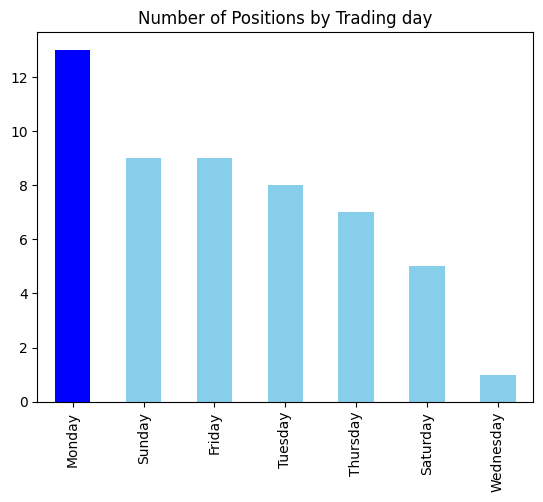

In [64]:
vix['day_of_week'].value_counts().plot(kind = 'bar', color = ['blue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue','skyblue'])
plt.title('Number of Positions by Trading day')
plt.show()

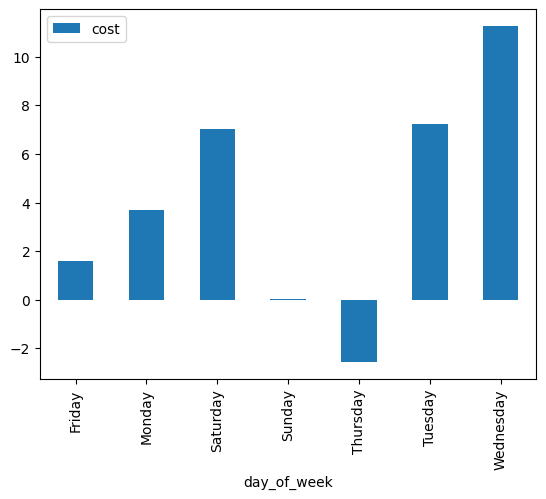

In [65]:
vix[['day_of_week', 'cost']].groupby(['day_of_week']).agg('mean').plot(kind = 'bar')
plt.show()

In [66]:
vix.day_of_week.unique().tolist()

['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Thursday', 'Friday', 'Wednesday']

In [67]:
days_name = ['Monday',  'Tuesday',  'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']

<Axes: xlabel='day_of_week'>

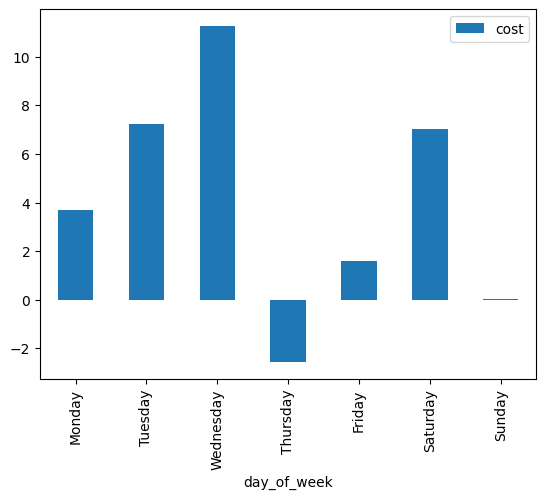

In [68]:
vix[['day_of_week', 'cost']].groupby(['day_of_week']).agg('mean')\
  .reindex(index = days_name)\
  .plot(kind = 'bar')

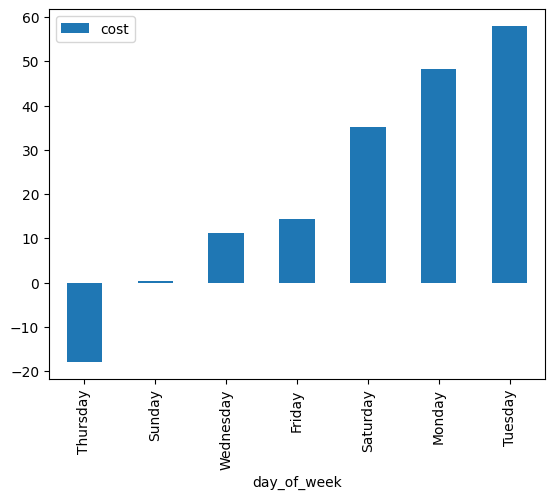

In [69]:
vix[['day_of_week', 'cost']].groupby(['day_of_week']).agg('sum').sort_values('cost').plot(kind = 'bar')
plt.show()

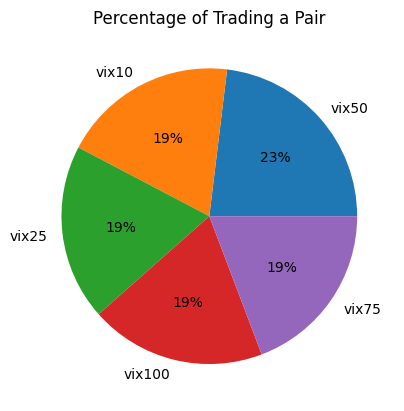

In [70]:
vix['Pair'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Percentage of Trading a Pair')
plt.ylabel('')
plt.show()

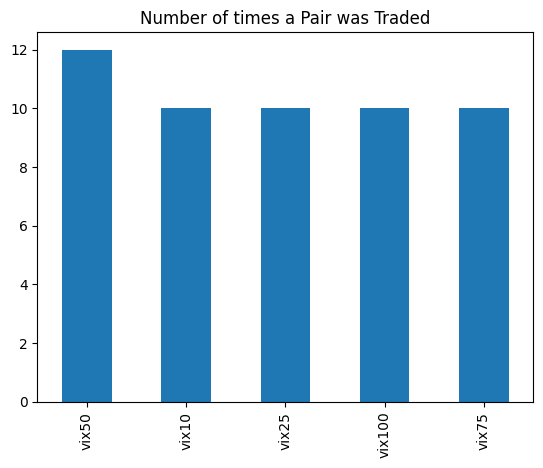

In [71]:
vix['Pair'].value_counts().plot(kind = 'bar')
plt.title('Number of times a Pair was Traded')
plt.show()

In [72]:
vix['Pair'].nunique()

5

In [73]:
vix_cost_sorted = vix[['Pair', 'cost' ]].groupby(['Pair']).agg(sum).sort_values('cost').reset_index()
print(vix_cost_sorted)

     Pair    cost
0   vix10  -27.55
1   vix50   -8.17
2   vix75   23.80
3   vix25   24.28
4  vix100  136.99


In [74]:
print('The best performing pair is ')#.format(vix_cost_sorted[['cost']].head(1)))
print(vix_cost_sorted[-1:])
print('')#.format(vix_cost_sorted[['cost']].head(1)))
print('The worst performing pair is ')#.format(vix_cost_sorted[['cost']].head(1)))
print(vix_cost_sorted[:1])

The best performing pair is 
     Pair    cost
4  vix100  136.99

The worst performing pair is 
    Pair   cost
0  vix10 -27.55


In [75]:
#average profit per pair
vix[['Pair', 'cost' ]].groupby(['Pair']).agg('mean').sort_values('cost', ascending=False).reset_index()

,Pair,cost
0,vix100,13.699000
1,vix25,2.428000
2,vix75,2.380000
3,vix50,-0.680833
4,vix10,-2.755000


In [76]:
vix['cumsum'] = vix['cost'].cumsum()
vix.head()

,Pair,Action,Outcome,cost,Date,EntryPrice,Sl,Tp,Time,Exittime,RRR,day_of_week,cumsum
0,vix10,Buy,sl,-6.38,2023-11-04,7103.4040,7090.8190,7136.2280,1900-01-01 00:19:21,1900-01-01 04:10:46,2.608184,Saturday,-6.38
1,vix25,Buy,tp,11.56,2023-11-04,2228.8090,2218.8910,2251.8760,1900-01-01 20:26:02,1900-01-01 22:23:30,2.325771,Saturday,5.18
2,vix100,Sell,tp,26.46,2023-11-05,1802.8000,1820.6500,1749.9100,1900-01-01 04:41:05,1900-01-01 08:19:21,2.963025,Sunday,31.64
3,vix10,Sell,sl,-3.26,2023-11-05,7084.9190,7091.3930,7062.7680,1900-01-01 04:41:26,1900-01-01 06:54:22,3.421532,Sunday,28.38
4,vix50,Buy,sl,-6.03,2023-11-05,191.5289,190.0258,195.7944,1900-01-01 13:55:44,1900-01-01 16:35:04,2.837802,Sunday,22.35


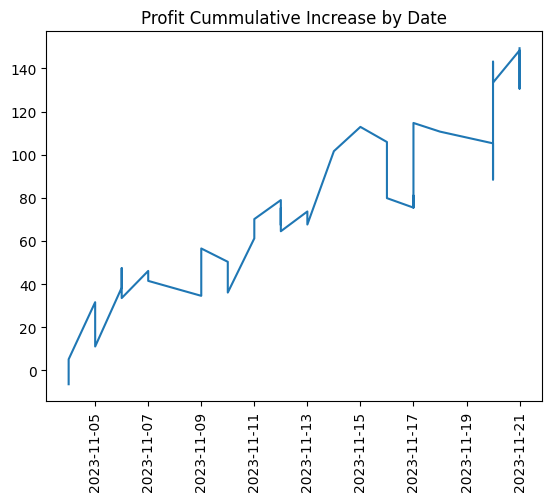

In [77]:
plt.plot(vix['Date'],vix['cumsum'])
plt.title('Profit Cummulative Increase by Date')
plt.xticks(rotation= 'vertical')
plt.show()

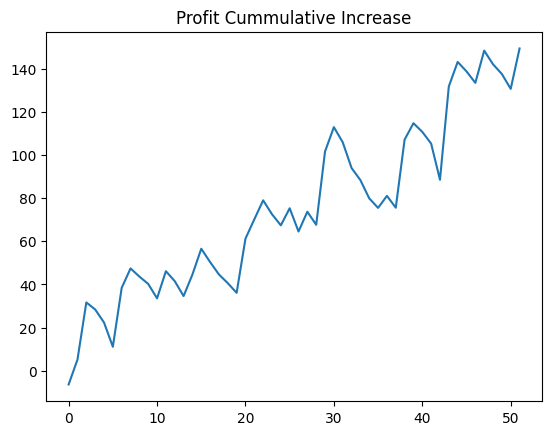

In [78]:
plt.plot(vix['cumsum'])
plt.title('Profit Cummulative Increase')

plt.show()

In [79]:
vix['cumsum'].max()

149.34999999999997

In [80]:
vix.describe()

,cost,EntryPrice,Sl,Tp,RRR,cumsum
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2.872115,97708.668919,97998.657727,96844.228948,2.495099,75.339423
std,13.296578,197021.800236,197596.360111,195446.762738,0.655602,40.673948
min,-16.750000,187.674200,188.494000,185.063000,1.262209,-6.380000
25%,-6.090000,1793.955000,1796.857500,1739.292500,2.013666,43.102500
50%,-4.215000,2172.955500,2173.401500,2172.915500,2.512033,73.105000
75%,10.300000,7152.177250,7152.337750,7139.099000,2.972337,106.192500
max,43.240000,545145.210000,549167.810000,546051.620000,4.488066,149.350000


In [81]:
lab = vix['Pair'].dropna().unique().tolist()

In [82]:
vix['Pair'].value_counts()

vix50     12
vix10     10
vix25     10
vix100    10
vix75     10
Name: Pair, dtype: int64

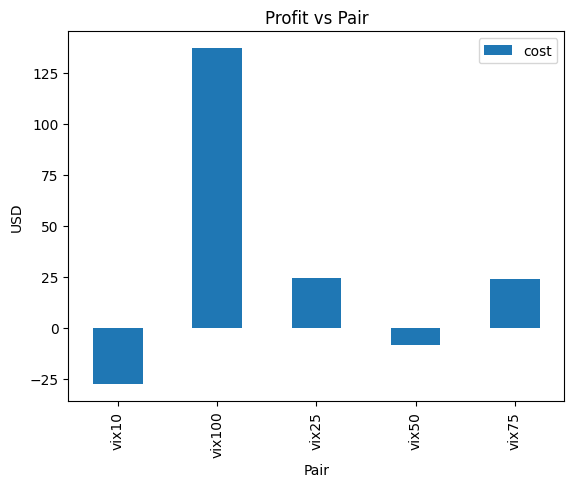

In [83]:
#color= ['lightblue', 'blue', 'purple', 'red', 'black']
vix[['Pair', 'cost']].groupby(['Pair']).agg('sum').plot(kind = 'bar')
plt.title('Profit vs Pair')
plt.ylabel('USD')
plt.show()

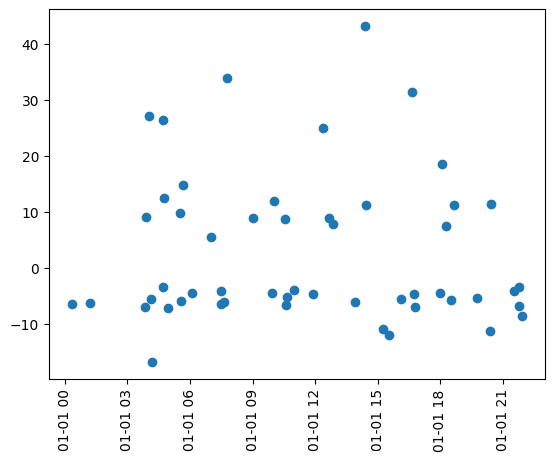

In [84]:
plt.scatter(vix['Time'], vix['cost'])
plt.xticks(rotation ='vertical' )
plt.show()

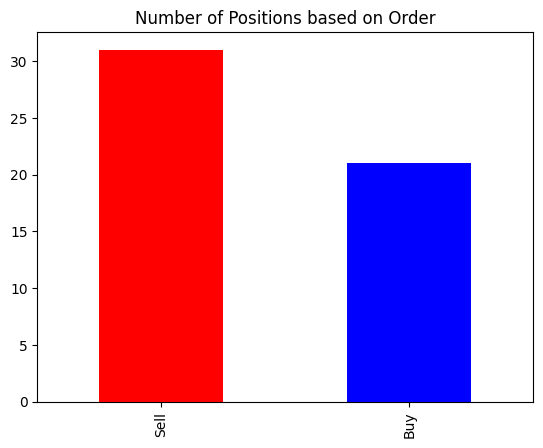

In [85]:
vix['Action'].value_counts().plot(kind = 'bar', color = ['red', 'blue'])
plt.title('Number of Positions based on Order')
plt.show()

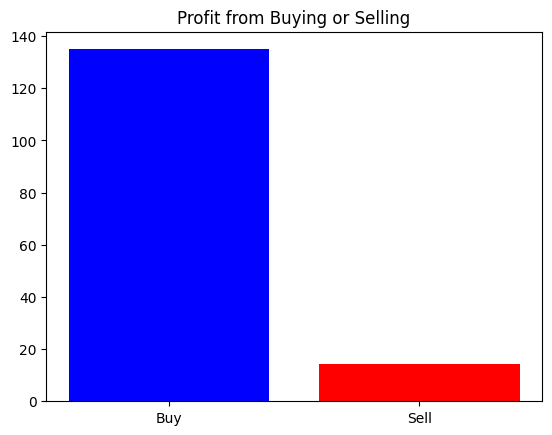

In [86]:
action_cost = vix[['Action', 'cost' ]].groupby(['Action']).agg('sum').reset_index()
plt.bar('Action', 'cost', data = action_cost, color = ['blue', 'red'])
plt.title('Profit from Buying or Selling')
#vix[['Action', 'cost' ]].groupby(['Action']).agg('sum').plot(kind = 'bar', color = ['red', 'blue', 'purple', 'red', 'black'])
plt.show()

In [87]:
vix['Date'].nunique()

16

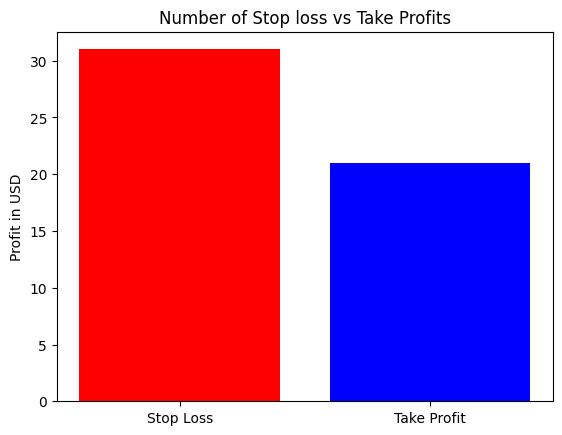

In [88]:
#print(vix['Outcome'].value_counts())
outcome = vix['Outcome'].value_counts()
#vix['Outcome'].value_counts().plot(kind = 'bar', color = ['red', 'blue'])
plt.bar(outcome.index, outcome.values,data=outcome, color = ['red', 'blue'])
plt.title('Number of Stop loss vs Take Profits')
plt.ylabel('Profit in USD')
plt.xticks(ticks = ['sl', 'tp'],labels= ['Stop Loss', 'Take Profit'])
plt.show()

In [89]:
no_ne = vix[['Outcome', 'cost']].groupby('Outcome').agg('sum').abs().reset_index()
no_ne

,Outcome,cost
0,sl,197.72
1,tp,347.07


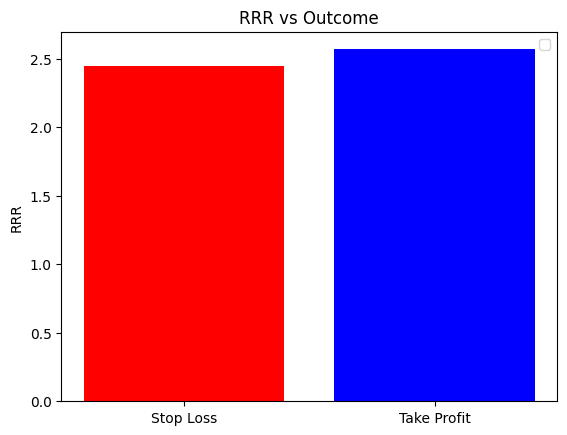

In [90]:
no_rr = vix[['Outcome', 'RRR']].groupby('Outcome').agg('mean').abs().reset_index()
plt.bar('Outcome', 'RRR', data = no_rr, color = ['red', 'blue'])
plt.title('RRR vs Outcome')
plt.xticks(ticks = ['sl', 'tp'],labels= ['Stop Loss', 'Take Profit'])
plt.ylabel('RRR')
plt.legend()
plt.show()

In [91]:
 no_rr = vix[['Outcome', 'RRR']].groupby('Outcome').agg('mean').abs().reset_index()
no_rr

,Outcome,RRR
0,sl,2.445722
1,tp,2.567988


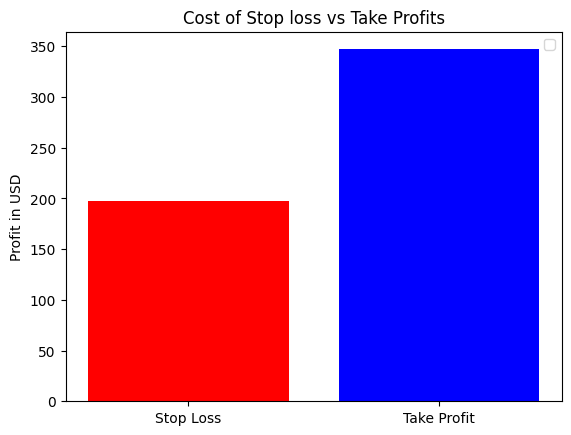

In [92]:
plt.bar('Outcome', 'cost', data = no_ne, color = ['red', 'blue'])
plt.title('Cost of Stop loss vs Take Profits')
plt.xticks(ticks = ['sl', 'tp'],labels= ['Stop Loss', 'Take Profit'])
plt.ylabel('Profit in USD')
plt.legend()
plt.show()

In [93]:
vix.resample('D', on='Date')['cost'].sum().max()

34.839999999999996

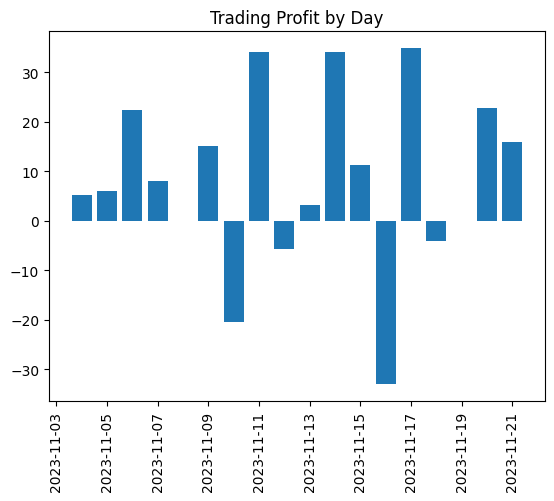

In [94]:
dt_resample = vix.resample('D', on='Date')['cost'].sum().reset_index()
dt_resample
plt.bar('Date', 'cost', data=dt_resample)
plt.title('Trading Profit by Day')
plt.xticks(rotation='vertical')
plt.show()


In [95]:
vix.columns

Index(['Pair', 'Action', 'Outcome', 'cost', 'Date', 'EntryPrice', 'Sl', 'Tp',
       'Time', 'Exittime', 'RRR', 'day_of_week', 'cumsum'],
      dtype='object')

In [96]:
vix_model_dummies = pd.get_dummies(vix[['Action', 'Pair', 'day_of_week']], drop_first = True)

In [97]:
vix_model_data = pd.concat([vix[['cost','Outcome', 'RRR']], vix_model_dummies], axis = 1)

In [98]:
vix_model_data['Outcome'] = vix_model_data['Outcome'].map({'tp': 1, 'sl': 0})

In [99]:
vix_model_data.isna().sum()

cost                     0
Outcome                  0
RRR                      0
Action_Sell              0
Pair_vix100              0
Pair_vix25               0
Pair_vix50               0
Pair_vix75               0
day_of_week_Monday       0
day_of_week_Saturday     0
day_of_week_Sunday       0
day_of_week_Thursday     0
day_of_week_Tuesday      0
day_of_week_Wednesday    0
dtype: int64

In [100]:
vix_model_data.head()

,cost,Outcome,RRR,Action_Sell,Pair_vix100,Pair_vix25,Pair_vix50,Pair_vix75,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,-6.38,0,2.608184,0,0,0,0,0,0,1,0,0,0,0
1,11.56,1,2.325771,0,0,1,0,0,0,1,0,0,0,0
2,26.46,1,2.963025,1,1,0,0,0,0,0,1,0,0,0
3,-3.26,0,3.421532,1,0,0,0,0,0,0,1,0,0,0
4,-6.03,0,2.837802,0,0,0,1,0,0,0,1,0,0,0


[ 0. -0.  0.  0. -0. -0. -0.  0. -0. -0.  0.  0.]



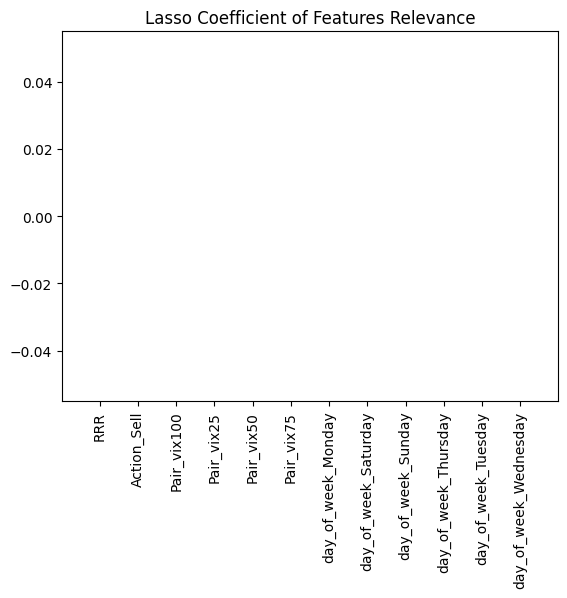

In [101]:
X = vix_model_data.drop(['Outcome', 'cost'], axis=1).values
y= vix_model_data['Outcome'].values.reshape(-1,1)
feature_col = vix_model_data.drop(['Outcome', 'cost'], axis=1).columns.to_list()
lasso = Lasso(alpha=1)
lasso.fit(X, y)

lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)
print('')

fig, ax = plt.subplots()
plt.bar(feature_col, lasso_coef)
plt.xticks(rotation=90)
plt.title('Lasso Coefficient of Features Relevance')
#plt.savefig('Lasso_coefficient.png')
plt.show()